<h1>Create dataset</h1>

Images and code is stored here

https://github.com/NicholasBlaskey/DATA440-indep-study/tree/master/polygonProject

Images are generated using OpenGL by taking a triangle or a square then applying random translations to them. These translations are a mix of rotations, scaling, and transformations (sliding). The images are then saved in either the triangle directory or the square directory depending on the starting image. The images are 32 by 32 pixels large. It took 3 minutes to generate the 10,000 images but this could easily largely be optimized in many ways.

The images are each in their own file saved in a simple format of a string of 1024 ones and zeros. The one signifies a color of white while 0 is one of black. It acts as flattened array of a two-dimesonal pixel matrix. 

The triangle directory files are numbered 0-number of images where all values are even. The square directory files are numbered 1-number of images where all values are odd.

<h1>Load a couple images as a sanity check</h1>


In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

image_size = 32
num_images = 10000

In [ ]:
def read_file(file_url):
  response = requests.get(file_url)
  return response.text

filePath = "https://raw.githubusercontent.com/NicholasBlaskey/DATA440-indep-study/master/polygonProject"

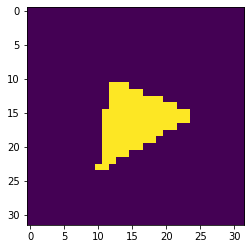

In [ ]:
def process_image(image):
  image = list(image)
  for i in range(len(image)):
    image[i] = float(image[i])
  return np.array(image).reshape(image_size, image_size)

example_image = process_image(read_file(filePath + "/triangle/2"))
plt.imshow(example_image)

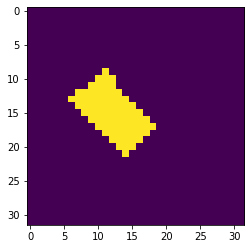

In [ ]:
plt.imshow(process_image(read_file(filePath + "/square/1")))

<h1>Load all the images<h1>

In [ ]:
!unzip data.zip

Archive:  data.zip
replace data/square/1? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import random
random.seed(42)

def read_file_drive(path):
  f = open(path, "r")
  out = f.read()
  f.close()
  return out

read_file_drive("data/square/9")

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111000000000000000000001111111111110000000000000000000011111111111100000000000000000000111111111111000000000000000000001111111111110000000000000000000011111111111100000000000000000000111111111111000000000000000000001111111111110000000000000000000011111111111100000000000000000000111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
X = []
y = []
for i in range(num_images):
  curFilePath = "data" 
  if i % 2 == 0:
    curFilePath += "/triangle/" + str(i) 
    y.append(0)
  else:
    curFilePath += "/square/" + str(i)
    y.append(1)
  
  try:
    X.append(process_image(read_file_drive(curFilePath)))
  except:
    y.pop()
  
print(len(X))
print(len(y))

9038
9038


<h1>Another sanity check</h1>

0


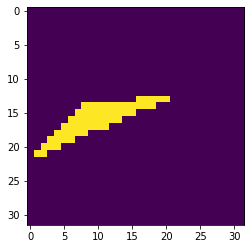

In [ ]:
plt.imshow(X[1291])
print(y[1291])

1


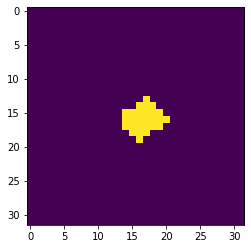

In [ ]:
plt.imshow(X[1290])
print(y[1290])

<h1>Now do preprocessing <h1>

In [ ]:
from sklearn.model_selection import train_test_split

flattened_X = []
for i in range(len(X)):
  flattened_X.append(X[i].reshape(image_size * image_size))

X_train, X_test, y_train, y_test = train_test_split(flattened_X, y, test_size = 0.20, random_state = 42)

print(len(X_train))
print(len(y_train))
print()
print(len(X_test))
print(len(y_test))

7230
7230

1808
1808


<h1>Let's see how well a linear SVM can handle this dataset</h1>

In [ ]:
from sklearn.svm import LinearSVC

def scoreModel(model, name):
  print(name, "scored ", model.score(X_train, y_train), " for train set")
  print(name, "scored ", model.score(X_test, y_test), " for test set")

linear = LinearSVC(loss = "hinge")
linear.fit(X_train, y_train)
scoreModel(linear, "linear SVM")

linear SVM scored  0.7738589211618258  for train set
linear SVM scored  0.6648230088495575  for test set


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<h1>Let's see now for different degrees of polynomial SVM</h1>


In [ ]:
from sklearn.svm import SVC

In [ ]:
degree = []
train_scores = []
test_scores = []
for i in range(2, 5):
  print(i)
  svm = SVC(kernel="poly", degree = i)
  svm.fit(X_train, y_train)
  
  degree.append(i)
  train_scores.append(svm.score(X_train, y_train))
  test_scores.append(svm.score(X_test, y_test))

2
3
4


In [ ]:
import matplotlib.pyplot as plt

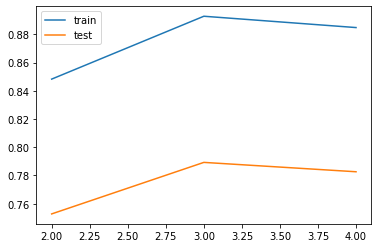

In [ ]:
plt.plot(degree, train_scores, label = "train")
plt.plot(degree, test_scores, label = "test")
plt.legend()

<h1>Let's see now for gaussian kernel</h1>

In [ ]:
gaussRBF = SVC(kernel="rbf", gamma=5)
gaussRBF.fit(X_train, y_train)

NameError: ignored

In [ ]:
scoreModel(gaussRBF, "Gauss rbf kernel")

Gauss rbf kernel scored  1.0  for train set
Gauss rbf kernel scored  0.5530973451327433  for test set


<h1>Let's now train a CNN network</h1>

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


#from tensorflow.keras import datasets, layers, models, optimizers
from keras.utils import to_categorical

In [ ]:
# taken from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

X = np.array(X).reshape(len(X), image_size, image_size, 1)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


print(X_train.shape)
print(y_train.shape)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test))

(7230, 32, 32, 1)
(7230,)
Epoch 1/30
226/226 [==============================] - 7s 32ms/step - loss: 0.5954 - accuracy: 0.6609 - val_loss: 0.4527 - val_accuracy: 0.8302
Epoch 2/30
226/226 [==============================] - 7s 32ms/step - loss: 0.3639 - accuracy: 0.8420 - val_loss: 0.3212 - val_accuracy: 0.8374
Epoch 3/30
226/226 [==============================] - 7s 32ms/step - loss: 0.1891 - accuracy: 0.9284 - val_loss: 0.1228 - val_accuracy: 0.9469
Epoch 4/30
226/226 [==============================] - 7s 32ms/step - loss: 0.0942 - accuracy: 0.9686 - val_loss: 0.1609 - val_accuracy: 0.9298
Epoch 5/30
226/226 [==============================] - 7s 32ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0721 - val_accuracy: 0.9751
Epoch 6/30
226/226 [==============================] - 7s 32ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0249 - val_accuracy: 0.9906
Epoch 7/30
226/226 [==============================] - 7s 31ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0

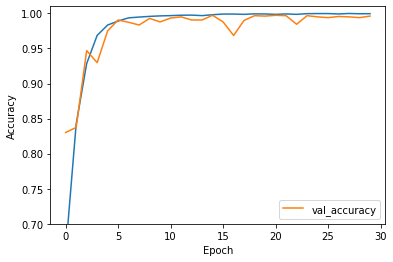

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.70, 1.01])
plt.legend(loc='lower right')
